In [58]:
import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint






%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [59]:
src_dir = 'C:\\Users\\USER\\Desktop\\Rock-Paper-Scissors\\rps-cv-images'
src_dir_yehonatan = '/home/gentex/Rock-Paper-Scissors/Rock-Paper-Scissors/rps-cv-images/'
paper_dir = os.path.join(src_dir,'paper')
rock_dir = os.path.join(src_dir,'rock')
scissors_dir = os.path.join(src_dir,'scissors')

In [60]:
labels = ['paper','scissors','rock']

In [61]:
def input_target_split(train_dirs, labels):
    dataset = []
    count = 0
    for label, train_dir in zip(labels, train_dirs):
        for image in os.listdir(train_dir):
            img = load_img(os.path.join(train_dir, image), target_size=(150, 150))
            img = img_to_array(img)
            img = img / 255.0
            dataset.append((img, count))
       
        count += 1
    random.shuffle(dataset)
    X, y = zip(*dataset)

    return np.array(X), np.array(y)

In [62]:
train_dirs = [paper_dir, scissors_dir, rock_dir]

data_rps, labels_rps = input_target_split(train_dirs,labels)

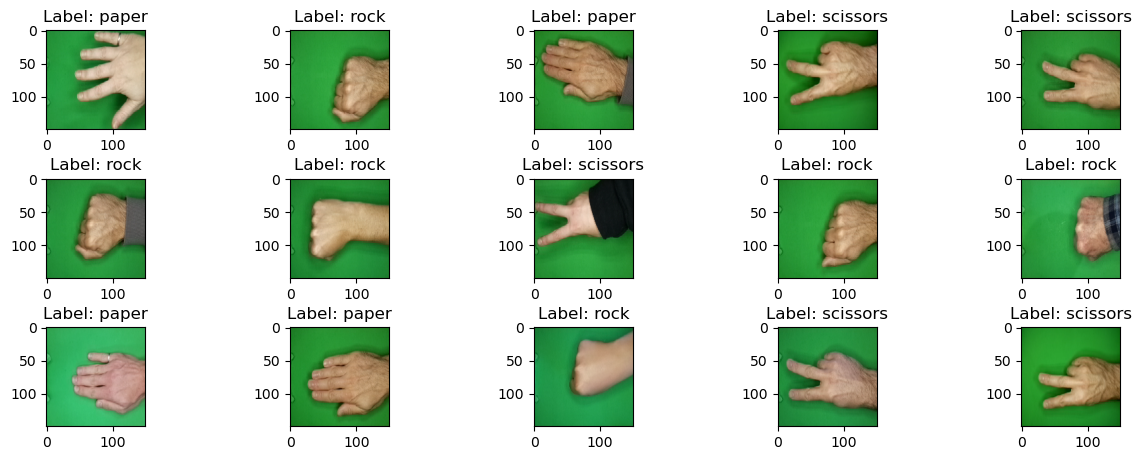

In [63]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(data_rps[i])
    plt.title(f'Label: {labels[labels_rps[i]]}')

# Label_names:
- 0: paper
- 1: scissors 
- 2: rock

In [64]:
data_rps_reshaped = data_rps.reshape(data_rps.shape[0], -1)

# Create a DataFrame with X_reshaped and y
df = pd.DataFrame(data=np.column_stack((data_rps_reshaped, labels_rps)), columns=[f'pixel_{i}' for i in range(data_rps_reshaped.shape[1])] + ['label'])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_67491,pixel_67492,pixel_67493,pixel_67494,pixel_67495,pixel_67496,pixel_67497,pixel_67498,pixel_67499,label
0,0.152941,0.541176,0.231373,0.156863,0.537255,0.223529,0.149020,0.537255,0.219608,0.149020,...,0.149020,0.478431,0.200000,0.156863,0.474510,0.200000,0.160784,0.478431,0.203922,0.0
1,0.152941,0.498039,0.168627,0.141176,0.490196,0.160784,0.152941,0.498039,0.168627,0.149020,...,0.168627,0.521569,0.172549,0.152941,0.513726,0.160784,0.164706,0.513726,0.164706,2.0
2,0.149020,0.494118,0.129412,0.145098,0.486275,0.121569,0.141176,0.482353,0.125490,0.149020,...,0.152941,0.498039,0.160784,0.152941,0.498039,0.160784,0.152941,0.498039,0.168627,0.0
3,0.062745,0.396078,0.078431,0.066667,0.403922,0.086275,0.070588,0.415686,0.086275,0.074510,...,0.054902,0.368627,0.062745,0.058824,0.364706,0.066667,0.050980,0.341176,0.050980,1.0
4,0.145098,0.450980,0.145098,0.133333,0.450980,0.141176,0.137255,0.443137,0.133333,0.152941,...,0.133333,0.482353,0.141176,0.129412,0.478431,0.137255,0.141176,0.478431,0.141176,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,0.156863,0.482353,0.160784,0.156863,0.482353,0.160784,0.145098,0.482353,0.145098,0.149020,...,0.176471,0.509804,0.164706,0.172549,0.513726,0.164706,0.172549,0.501961,0.176471,0.0
2184,0.270588,0.556863,0.200000,0.262745,0.552941,0.188235,0.270588,0.556863,0.192157,0.262745,...,0.305882,0.666667,0.258824,0.305882,0.666667,0.258824,0.305882,0.662745,0.266667,2.0
2185,0.200000,0.556863,0.223529,0.200000,0.556863,0.223529,0.192157,0.549020,0.215686,0.200000,...,0.207843,0.592157,0.258824,0.203922,0.588235,0.247059,0.211765,0.596078,0.262745,2.0
2186,0.137255,0.462745,0.156863,0.133333,0.458824,0.145098,0.133333,0.458824,0.145098,0.141176,...,0.152941,0.490196,0.164706,0.152941,0.490196,0.172549,0.160784,0.478431,0.160784,2.0


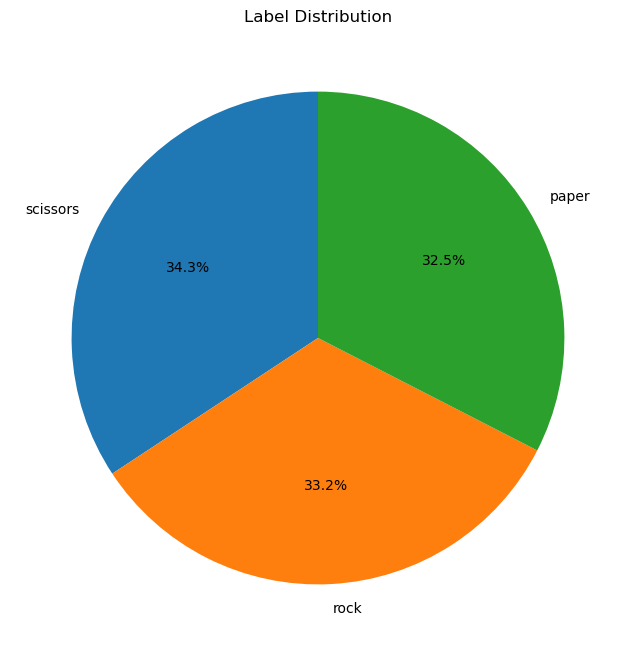

In [65]:

labels_num = df['label']

# Create a dictionary to map numerical labels to class names
label_names = {0: 'paper', 1: 'scissors', 2: 'rock'}

# Map numerical labels to class names in labels_num
class_labels = [label_names[label] for label in labels_num]

# Count the occurrences of each label
label_counts = pd.Series(class_labels).value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Label Distribution')
plt.show()

## We can understand is balanced, So we don't need to adjust it.


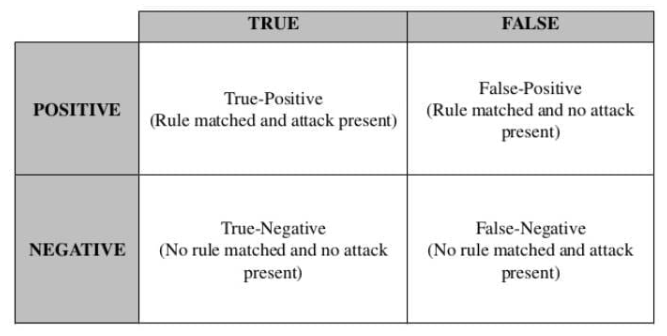

### Beacuase the data is balanced we can use the accuracy metrics scoring
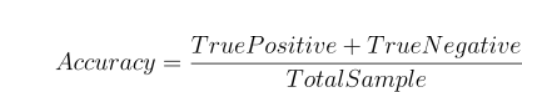

In [66]:
print(data_rps.shape)
print(labels_rps.shape)

(2188, 150, 150, 3)
(2188,)


## Split the data

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data_rps, labels_rps, test_size=0.25, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([0, 1, 2]), array([552, 550, 539], dtype=int64)) (array([0, 1, 2]), array([160, 200, 187], dtype=int64))


## Dummy model

In [68]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,round(accuracy_score(y_pred,y_test),4))

The DummyClassifier score is: 0.2925


## Logistic Regression

In [69]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint

# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Ensure labels are in the correct format and range
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

# Define input shape
input_shape = (150*150*3,)

# Define the number of classes
num_classes = 3

# Define the logistic regression model with softmax activation for multi-class classification
model = tf.keras.Sequential([
    layers.Input(shape=input_shape),
    layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.001))
])

# Compile the model with appropriate loss function for multi-class classification
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Use ModelCheckpoint to save the model with the best validation accuracy
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model with ModelCheckpoint
history = model.fit(X_train_flat, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2, callbacks=[model_checkpoint_callback])

# Load the best model
model.load_weights(checkpoint_filepath)

# Get the best accuracy and its corresponding loss
best_accuracy = max(history.history['val_accuracy'])
best_loss = history.history['val_loss'][history.history['val_accuracy'].index(best_accuracy)]

# Print the best accuracy and loss
print(f'Best Accuracy: {best_accuracy:.4f}')
print(f'Corresponding Loss: {best_loss:.4f}')


Epoch 1/100
36/41 [=========================>....] - ETA: 0s - loss: 29.2934 - accuracy: 0.3967
Epoch 1: val_accuracy improved from -inf to 0.32523, saving model to best_model.h5
41/41 [==============================] - 1s 16ms/step - loss: 30.1505 - accuracy: 0.3857 - val_loss: 16.7106 - val_accuracy: 0.3252
Epoch 2/100
36/41 [=========================>....] - ETA: 0s - loss: 20.7849 - accuracy: 0.4653
Epoch 2: val_accuracy improved from 0.32523 to 0.53191, saving model to best_model.h5
41/41 [==============================] - 0s 11ms/step - loss: 18.6824 - accuracy: 0.4916 - val_loss: 20.3233 - val_accuracy: 0.5319
Epoch 3/100
39/41 [===========================>..] - ETA: 0s - loss: 13.9844 - accuracy: 0.5409
Epoch 3: val_accuracy improved from 0.53191 to 0.60486, saving model to best_model.h5
41/41 [==============================] - 0s 10ms/step - loss: 13.5775 - accuracy: 0.5442 - val_loss: 6.5389 - val_accuracy: 0.6049
Epoch 4/100
41/41 [==============================] - ETA: 0s -

Epoch 30/100
38/41 [==========================>...] - ETA: 0s - loss: 1.7682 - accuracy: 0.8528
Epoch 30: val_accuracy improved from 0.87842 to 0.89362, saving model to best_model.h5
41/41 [==============================] - 0s 10ms/step - loss: 1.7472 - accuracy: 0.8559 - val_loss: 1.2672 - val_accuracy: 0.8936
Epoch 31/100
38/41 [==========================>...] - ETA: 0s - loss: 3.5724 - accuracy: 0.7903
Epoch 31: val_accuracy did not improve from 0.89362
41/41 [==============================] - 0s 9ms/step - loss: 3.5390 - accuracy: 0.7843 - val_loss: 1.9224 - val_accuracy: 0.8632
Epoch 32/100
36/41 [=========================>....] - ETA: 0s - loss: 2.6699 - accuracy: 0.8186
Epoch 32: val_accuracy improved from 0.89362 to 0.90274, saving model to best_model.h5
41/41 [==============================] - 0s 10ms/step - loss: 2.4342 - accuracy: 0.8308 - val_loss: 1.3082 - val_accuracy: 0.9027
Epoch 33/100
37/41 [==========================>...] - ETA: 0s - loss: 2.7855 - accuracy: 0.7956
E

39/41 [===========================>..] - ETA: 0s - loss: 2.0876 - accuracy: 0.8421
Epoch 59: val_accuracy did not improve from 0.90578
41/41 [==============================] - 0s 10ms/step - loss: 2.0190 - accuracy: 0.8460 - val_loss: 1.2013 - val_accuracy: 0.8480
Epoch 60/100
41/41 [==============================] - ETA: 0s - loss: 0.7617 - accuracy: 0.9162
Epoch 60: val_accuracy did not improve from 0.90578
41/41 [==============================] - 0s 11ms/step - loss: 0.7617 - accuracy: 0.9162 - val_loss: 2.4693 - val_accuracy: 0.8085
Epoch 61/100
37/41 [==========================>...] - ETA: 0s - loss: 3.3806 - accuracy: 0.7728
Epoch 61: val_accuracy did not improve from 0.90578
41/41 [==============================] - 0s 10ms/step - loss: 3.1164 - accuracy: 0.7866 - val_loss: 1.0308 - val_accuracy: 0.8815
Epoch 62/100
35/41 [========================>.....] - ETA: 0s - loss: 0.7526 - accuracy: 0.9161
Epoch 62: val_accuracy did not improve from 0.90578
41/41 [========================

41/41 [==============================] - 0s 9ms/step - loss: 2.2813 - accuracy: 0.8300 - val_loss: 1.2035 - val_accuracy: 0.8571
Epoch 89/100
37/41 [==========================>...] - ETA: 0s - loss: 0.6301 - accuracy: 0.9299
Epoch 89: val_accuracy did not improve from 0.91185
41/41 [==============================] - 0s 10ms/step - loss: 0.6303 - accuracy: 0.9314 - val_loss: 0.9189 - val_accuracy: 0.9119
Epoch 90/100
37/41 [==========================>...] - ETA: 0s - loss: 1.3292 - accuracy: 0.8725
Epoch 90: val_accuracy did not improve from 0.91185
41/41 [==============================] - 0s 9ms/step - loss: 1.2413 - accuracy: 0.8803 - val_loss: 1.5805 - val_accuracy: 0.8359
Epoch 91/100
40/41 [============================>.] - ETA: 0s - loss: 0.5765 - accuracy: 0.9312
Epoch 91: val_accuracy did not improve from 0.91185
41/41 [==============================] - 0s 11ms/step - loss: 0.5645 - accuracy: 0.9329 - val_loss: 1.0063 - val_accuracy: 0.8815
Epoch 92/100
37/41 [==================

### The best Accuracy is : 0.9119 of Logisitic Regression

## Convolutional neural network (CNN)


In [70]:
# Normalize pixel values to be between 0 and 1
X_train_normalized = X_train
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_train_reshaped = X_train_normalized.reshape(X_train_normalized.shape + (1,))
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

# Split the data into training and validation sets
X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train_reshaped, y_train, test_size=0.25, random_state=42)




1. **Conv2D Layer:**
   - `32`: This is the number of filters (or kernels) in the convolutional layer. It determines the number of features the model will learn.
   - `(3, 3)`: The size of the convolutional window (filter) that slides over the input. A larger window captures more complex patterns but also increases computation. A common choice is (3, 3).

2. **MaxPooling2D Layer:**
   - `(2, 2)`: The size of the max pooling window. Max pooling reduces the spatial dimensions of the representation and therefore computation in the network.

3. **Flatten Layer:**
   - This layer is used to flatten the input. It converts the multi-dimensional data into a one-dimensional array before feeding it into the dense layers.

4. **Dense Layers:**
   - `64`: The number of neurons (units) in the dense layer. This layer is fully connected, meaning each neuron in the layer is connected to every neuron in the previous layer.
   - `relu`: Rectified Linear Unit (ReLU) is the activation function applied to the output of each neuron in the layer. ReLU is commonly used in hidden layers to introduce non-linearity.

5. **Dense Output Layer:**
   - `3`: The number of output neurons, corresponding to the number of classes in your classification task (assuming it's a multi-class classification). In your case, it's 3 for 'paper', 'scissors', and 'rock'.
   - `softmax`: Activation function for the output layer in multi-class classification problems. It normalizes the output values into a probability distribution, making it suitable for classification.

6. **Optimizer:**
   - `adam`: Stochastic Gradient Descent (SGD) optimization algorithm. It adapts the learning rates of each parameter individually, providing a balance between the benefits of both AdaGrad and RMSProp.

7. **Loss Function:**
   - `sparse_categorical_crossentropy`: This loss function is suitable for multi-class classification problems. It calculates the cross-entropy loss between the true labels and predicted labels.

8. **Metrics:**
   - `accuracy`: A metric that measures the accuracy of the model on the training and validation sets. It represents the proportion of correctly classified instances.

These hyperparameters are chosen based on empirical observations, experimentation, and best practices in the field. It's common to start with a set of values that are known to work well for similar problems and then fine-tune based on the model's performance. Grid search or random search can also be used to explore different combinations of hyperparameters more systematically.

In [71]:

def create_cnn_model():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(64, activation='relu'))

    
    model.add(layers.Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [72]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 3)                 202503    
                                                                 
Total params: 202,503
Trainable params: 202,503
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Use ModelCheckpoint to save the model with the best validation accuracy
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)


In [74]:
# Create and train the CNN model with ModelCheckpoint
model = create_cnn_model()
history = model.fit(X_train_fold, y_train_fold, epochs=20, validation_data=(X_val_fold, y_val_fold), callbacks=[model_checkpoint_callback])

# Retrieve the best accuracy and corresponding parameters from the history
best_val_accuracy = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_accuracy) + 1
best_val_loss = history.history['val_loss'][best_epoch - 1]

# Print the best accuracy and corresponding parameters
print(f'Best Accuracy: {best_val_accuracy:.4f}')
print(f'Corresponding Parameters: Epoch {best_epoch}/20 - val_loss={best_val_loss:.4f}, val_accuracy={best_val_accuracy:.4f}')

# Load the best model
best_model = tf.keras.models.load_model(checkpoint_filepath)

Epoch 1/20
39/39 [==============================] - ETA: 0s - loss: 1.0411 - accuracy: 0.4504
Epoch 1: val_accuracy improved from -inf to 0.80535, saving model to best_model.h5
39/39 [==============================] - 37s 896ms/step - loss: 1.0411 - accuracy: 0.4504 - val_loss: 0.5955 - val_accuracy: 0.8054
Epoch 2/20
39/39 [==============================] - ETA: 0s - loss: 0.4309 - accuracy: 0.8390
Epoch 2: val_accuracy improved from 0.80535 to 0.92457, saving model to best_model.h5
39/39 [==============================] - 33s 848ms/step - loss: 0.4309 - accuracy: 0.8390 - val_loss: 0.2225 - val_accuracy: 0.9246
Epoch 3/20
39/39 [==============================] - ETA: 0s - loss: 0.1817 - accuracy: 0.9301
Epoch 3: val_accuracy improved from 0.92457 to 0.93431, saving model to best_model.h5
39/39 [==============================] - 32s 833ms/step - loss: 0.1817 - accuracy: 0.9301 - val_loss: 0.1624 - val_accuracy: 0.9343
Epoch 4/20
39/39 [==============================] - ETA: 0s - loss:

### The best Accuracy is : 0.9830 of CNN

We can understand that the CNN model is better than Logistic Regression

## There is improvement with cross validation

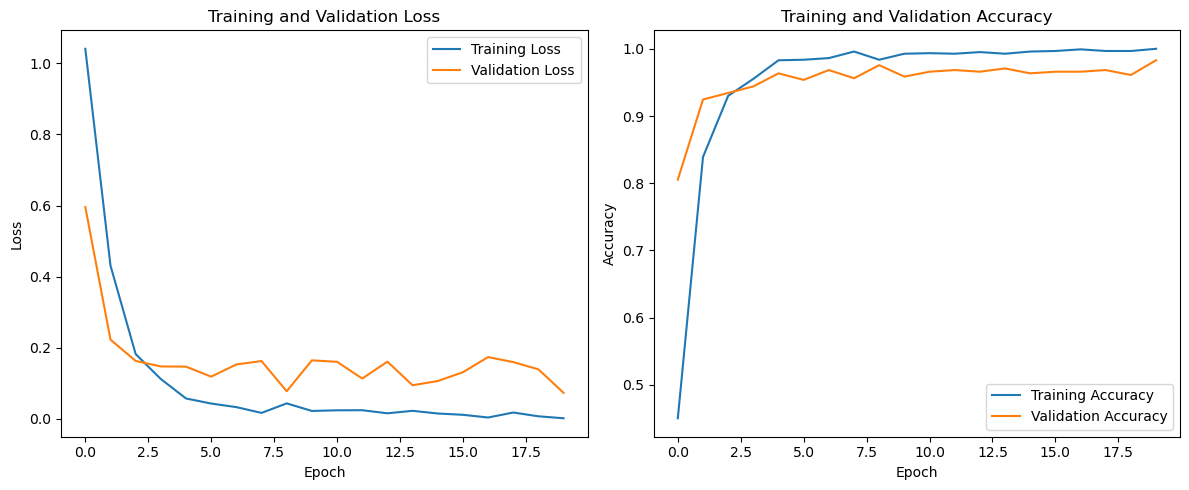

In [77]:
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Predict the test

18/18 [==============================] - 2s 112ms/step


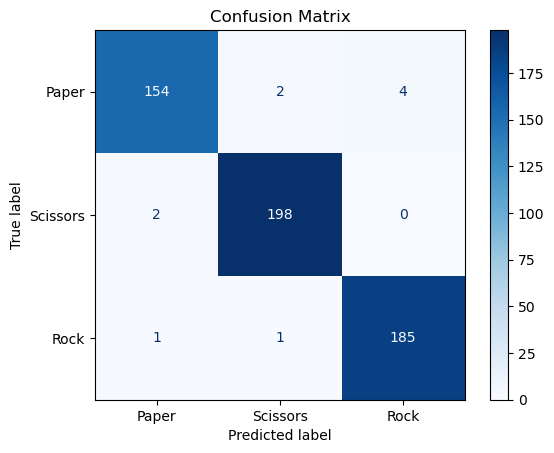


Classification Report:
              precision    recall  f1-score   support

       Paper       0.98      0.96      0.97       160
    Scissors       0.99      0.99      0.99       200
        Rock       0.98      0.99      0.98       187

    accuracy                           0.98       547
   macro avg       0.98      0.98      0.98       547
weighted avg       0.98      0.98      0.98       547


Accuracy: 0.9817


In [78]:
from sklearn.metrics import classification_report, accuracy_score

# Predict the labels for the test set
X_test_normalized = X_test 

# Reshape data for CNN (add channel dimension for grayscale)
X_test_reshaped = X_test_normalized.reshape(X_test_normalized.shape + (1,))

y_pred = best_model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
labels = ['Paper', 'Scissors', 'Rock']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_classes, target_names=labels))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'\nAccuracy: {accuracy:.4f}')


# Test Score: 0.9817